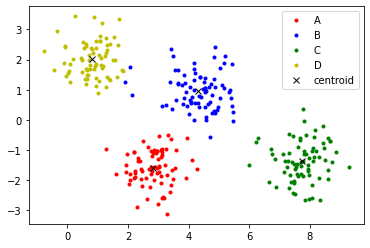

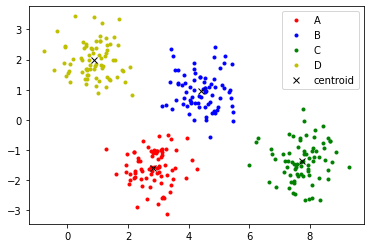

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data = pd.read_csv("cdata.csv")

def Average(lst): 
    return sum(lst) / len(lst)

ran_count=0
resultList=[]

while ran_count<4:                         #產生4個隨機值
    tem_ran=random.randint(0,len(data)-1)
    if(tem_ran not in resultList):
        resultList.append(tem_ran)
        ran_count+=1

list_x=[[]* 1 for i in range(len(resultList))]
list_y=[[]* 1 for i in range(len(resultList))]
dis=[[] * 1 for i in range(len(data))]
new_centroid=[[]*1 for i in range(len(resultList))]
list_idx=[]
output_centroid=[[]*1 for i in range(2)]

while True:

    for i in range(len(new_centroid)):
        new_centroid[i].clear()

    if len(list_x[0])==0:
        for i in range(len(resultList)):
            new_centroid[i].append(data['x'].iloc[resultList[i]])   #找出產生的隨機值對應到的點，將其設為中心點
            new_centroid[i].append(data['y'].iloc[resultList[i]])
    else:
        for i in range(len(resultList)):
            new_centroid[i].append(Average(list_x[i]))              #利用分群後的點找出新中心點
            new_centroid[i].append(Average(list_y[i]))

    new_centroid_df=pd.DataFrame(new_centroid,columns=['x','y'])

    for i in range(len(dis)):
        dis[i].clear()

    for i in range(len(data)):
        for j in range(len(new_centroid_df)):                  #算每個點與4個中心點的歐式距離

            var1=pd.Series([data['x'][i],data['y'][i]])
            var2=pd.Series([new_centroid_df['x'].iloc[j],new_centroid_df['y'].iloc[j]])
            dis[i].append(np.sqrt(np.sum(np.square(var1-var2))))
    
    dis_df=pd.DataFrame(dis)

    list_idx.clear()

    differ_num=0
    
    for i in range(len(dis_df)):
        list_idx.append(dis_df.iloc[i].tolist().index(min(dis_df.iloc[i])))      #與哪一中心點的距離最短，則分派為該群
        if data['cluster'][i]!=list_idx[i]:
            differ_num+=1

    if differ_num>1:              #若與前次iterable相比，只有1個點所屬的群改變，則結束迴圈
        data['cluster']=list_idx
    else:
        break

    for i in range(len(list_x)):
        list_x[i].clear()
        list_y[i].clear()

    for i in range(len(data)):                       #將同群的點分到同list
            for j in range(len(resultList)):
                if data['cluster'][i]==j:
                    list_x[j].append(data['x'][i])
                    list_y[j].append(data['y'][i])
            
    for i in range(len(output_centroid)):
        output_centroid[i].clear()
    
    for i in range(4):
        output_centroid[0].append(Average(list_x[i]))
        output_centroid[1].append(Average(list_y[i]))

    plt.plot(list_x[0], list_y[0],"r.",label='A')
    plt.plot(list_x[1], list_y[1],"b.",label='B')
    plt.plot(list_x[2], list_y[2],"g.",label='C')
    plt.plot(list_x[3], list_y[3],"y.",label='D')
    plt.plot(output_centroid[0],output_centroid[1],"xk",label='centroid')
    plt.legend()
    plt.show()

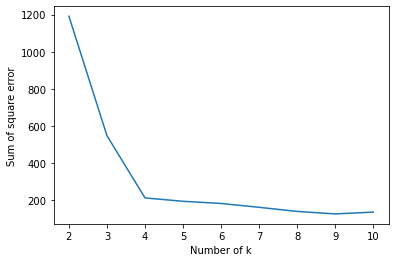

In [2]:
global_output_centroid=[]

def generate_chart(data: pd.DataFrame,num_k: int):
    ran_count=0
    resultList=[]

    while ran_count<num_k:                         #產生4個隨機值
        tem_ran=random.randint(0,len(data)-1)
        if(tem_ran not in resultList):
            resultList.append(tem_ran)
            ran_count+=1

    list_x=[[]* 1 for i in range(len(resultList))]
    list_y=[[]* 1 for i in range(len(resultList))]
    dis=[[] * 1 for i in range(len(data))]
    new_centroid=[[]*1 for i in range(len(resultList))]
    list_idx=[]
    output_centroid=[[]*1 for i in range(2)]

    while True:

        for i in range(len(new_centroid)):
            new_centroid[i].clear()

        if len(list_x[0])==0:
            for i in range(len(resultList)):
                new_centroid[i].append(data['x'].iloc[resultList[i]])   #找出產生的隨機值對應到的點，將其設為中心點
                new_centroid[i].append(data['y'].iloc[resultList[i]])
        else:
            for i in range(len(resultList)):
                new_centroid[i].append(Average(list_x[i]))              #利用分群後的點找出新中心點
                new_centroid[i].append(Average(list_y[i]))

        new_centroid_df=pd.DataFrame(new_centroid,columns=['x','y'])

        for i in range(len(dis)):
            dis[i].clear()

        for i in range(len(data)):
            for j in range(len(new_centroid_df)):                  #算每個點與4個中心點的歐式距離

                var1=pd.Series([data['x'][i],data['y'][i]])
                var2=pd.Series([new_centroid_df['x'].iloc[j],new_centroid_df['y'].iloc[j]])
                dis[i].append(np.sqrt(np.sum(np.square(var1-var2))))

        dis_df=pd.DataFrame(dis)

        list_idx.clear()

        differ_num=0

        for i in range(len(dis_df)):
            list_idx.append(dis_df.iloc[i].tolist().index(min(dis_df.iloc[i])))      #與哪一中心點的距離最短，則分派為該群
            if data['cluster'][i]!=list_idx[i]:
                differ_num+=1

        if differ_num>1:              #若與前次iterable相比，只有1個點所屬的群改變，則結束迴圈
            data['cluster']=list_idx
        else:
            return data,output_centroid
        
            break

        for i in range(len(list_x)):
            list_x[i].clear()
            list_y[i].clear()

        for i in range(len(data)):                       #將同群的點分到同list
                for j in range(len(resultList)):
                    if data['cluster'][i]==j:
                        list_x[j].append(data['x'][i])
                        list_y[j].append(data['y'][i])

        for i in range(len(output_centroid)):
            output_centroid[i].clear()

        for i in range(num_k):
            output_centroid[0].append(Average(list_x[i]))
            output_centroid[1].append(Average(list_y[i]))
            
def generate_sse(data: pd.DataFrame,global_output_centroid: list):
    
    sse_sum=0
    
    for i in range(len(global_output_centroid[0])):         #計算分為k群時的sse
        for j in range(len(data)):
            if data['cluster'][j]==i:
                var1=pd.Series([data['x'][j],data['y'][j]])
                var2=pd.Series([global_output_centroid[0][i],global_output_centroid[1][i]])
                sse_sum+=np.sum(np.square(var1-var2))
    
    return sse_sum


global_sse_sum_list=[]

for num_k in range(2,11):    #從2到10群

    data,global_output_centroid=generate_chart(data,num_k)
            
    global_sse_sum_list.append(generate_sse(data,global_output_centroid))
    

    
plt.xlabel("Number of k")
plt.ylabel("Sum of square error")
plt.plot(list(range(2,11)),global_sse_sum_list)

<BarContainer object of 10 artists>

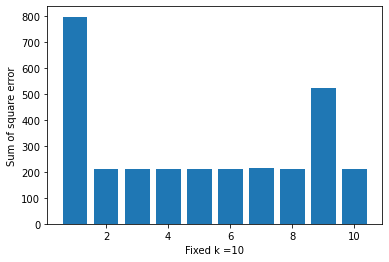

In [3]:
global_sse_sum_list=[]
cou=0

while cou<10:              #分4群，做10次
    
    cou+=1
    
    data,global_output_centroid=generate_chart(data,4)

    global_sse_sum_list.append(generate_sse(data,global_output_centroid))
    
plt.xlabel("Fixed k =10")
plt.ylabel("Sum of square error")
plt.bar(list(range(1,11)),global_sse_sum_list)